In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path ='/content/sample_data/bank-additional-full.xlsx'
df=pd.read_excel(path)
pd.set_option('display.max_columns',100)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#**A. EDA**

## Cek Kolom

### 1. Delete Column

In [ ]:
 # poutcome dan kolom lain tidak diperlukan
drop= ['duration','poutcome', 'emp.var.rate', 'nr.employed']
df.drop(columns=drop, inplace=True)

### 2. Rename Column

In [ ]:
df.rename(columns={'pdays':'day after campaign','previous':'previous campaign', 'cons.conf.idx':'con trust index','cons.price.idx':'IHK','euribor3m':'IR interbank'},inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,day after campaign,previous campaign,IHK,con trust index,IR interbank,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,93.994,-36.4,4.857,no


## Cek Values

### Label Encoding 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Mempersiapkan labell
label_mapping ={'yes':1, 'no':0, 'unknown':np.nan}
le= LabelEncoder()

# Mengubah tipe kategorikal ke tipe numerik
df['default'] = le.fit_transform(df['default'].map(label_mapping))
df['housing'] = le.fit_transform(df['housing'].map(label_mapping))
df['loan']    = le.fit_transform(df['loan'].map(label_mapping))
df['y']    = le.fit_transform(df['y'].map(label_mapping))

# Mengisi nilai nan dengan modus dari data
df['housing'] = df['housing'].fillna(df['housing'].mode())
df['default'] = df['default'].fillna(df['default'].mode())
df['loan'] = df['loan'].fillna(df['loan'].mode())

### Label Encoding 2

In [ ]:
label_mapping= {'telephone':0, 'cellular':1}
le= LabelEncoder()
df['contact'] = le.fit_transform(df['contact'].map(label_mapping))

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
# Marital
label_mapping = {'married':2, 'divorced':1, 'single':0, 'unknown':np.nan}
le= LabelEncoder()
df['marital'] = le.fit_transform(df['marital'].map(label_mapping))
df['marital'] = df['marital'].fillna(df['marital'].mode())

### Label Encoding 3

In [ ]:
label_mapping = {
    'housemaid': 3,
    'services': 3,
    'admin.': 3,
    'blue-collar': 3,
    'technician': 3,
    'management': 3,
    'self-employed': 3,
    'entrepreneur': 3,
    'retired': 2,
    'student': 1,
    'unknown': np.nan
}
le= LabelEncoder()
df['job'] = le.fit_transform(df['job'].map(label_mapping))
df['job'] = df['job'].fillna(df['job'].mode())

In [ ]:
# Education
label_mapping = {
    'basic.4y': 1,  # Pendidikan dasar
    'basic.6y': 1,  # Pendidikan dasar
    'basic.9y': 1,  # Pendidikan dasar
    'high.school': 1,  # Sekolah menengah atas
    'professional.course': 2,  # Kursus profesional
    'university.degree': 3,  # Gelar perguruan tinggi
    'illiterate': 0,  # Buta huruf
    'unknown': np.nan  #
}
le= LabelEncoder()
df['education'] = le.fit_transform(df['education'].map(label_mapping))
df['education'] = df['education'].fillna(df['education'].mode())

### Label Encoding 4

In [ ]:
# day_of_week
day_mapping = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}
le= LabelEncoder()
df['day_of_week'] = le.fit_transform(df['day_of_week'].map(day_mapping))
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].mode())

In [ ]:
# Months
month_mapping = {
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'oct': 10,
    'nov': 11,
    'dec': 12,
    'mar': 3,
    'apr': 4,
    'sep': 9
}
le= LabelEncoder()
df['month'] = le.fit_transform(df['month'].map(day_mapping))
df['month'] = df['month'].fillna(df['month'].mode())

## Cek Baris

In [ ]:
# Cek data duplicated
dup= df[df.duplicated(keep='last')]
print(dup)

print('\n\nTotal data duplicate :',df.duplicated().sum())

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    2        2          1        0        0     0        0      0   
2       37    2        2          1        0        1     0        0      0   
3       40    2        2          1        0        0     0        0      0   
7       41    2        2          4        2        0     0        0      0   
9       25    2        0          1        0        1     0        0      0   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
39979   27    2        0          1        0        0     0        1      0   
40399   31    0        0          4        0        1     0        1      0   
40402   41    2        2          3        0        1     0        1      0   
40804   35    2        2          2        0        1     0        1      0   
40833   32    2        0          3        0        1     0        1      0   

       day_of_week  campaign  day after campaign  p

In [ ]:
# Menghapus data duplikat dan menyisakan baris pertama
df=df.drop_duplicates()

## Cek Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37673 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 37673 non-null  int64  
 1   job                 37673 non-null  int64  
 2   marital             37673 non-null  int64  
 3   education           37673 non-null  int64  
 4   default             37673 non-null  int64  
 5   housing             37673 non-null  int64  
 6   loan                37673 non-null  int64  
 7   contact             37673 non-null  int64  
 8   month               37673 non-null  int64  
 9   day_of_week         37673 non-null  int64  
 10  campaign            37673 non-null  int64  
 11  day after campaign  37673 non-null  int64  
 12  previous campaign   37673 non-null  int64  
 13  IHK                 37673 non-null  float64
 14  con trust index     37673 non-null  float64
 15  IR interbank        37673 non-null  float64
 16  y   

In [ ]:
df.isnull().values.any()

False

Text(0.5, 1.05, 'Pearson correlation of Features')

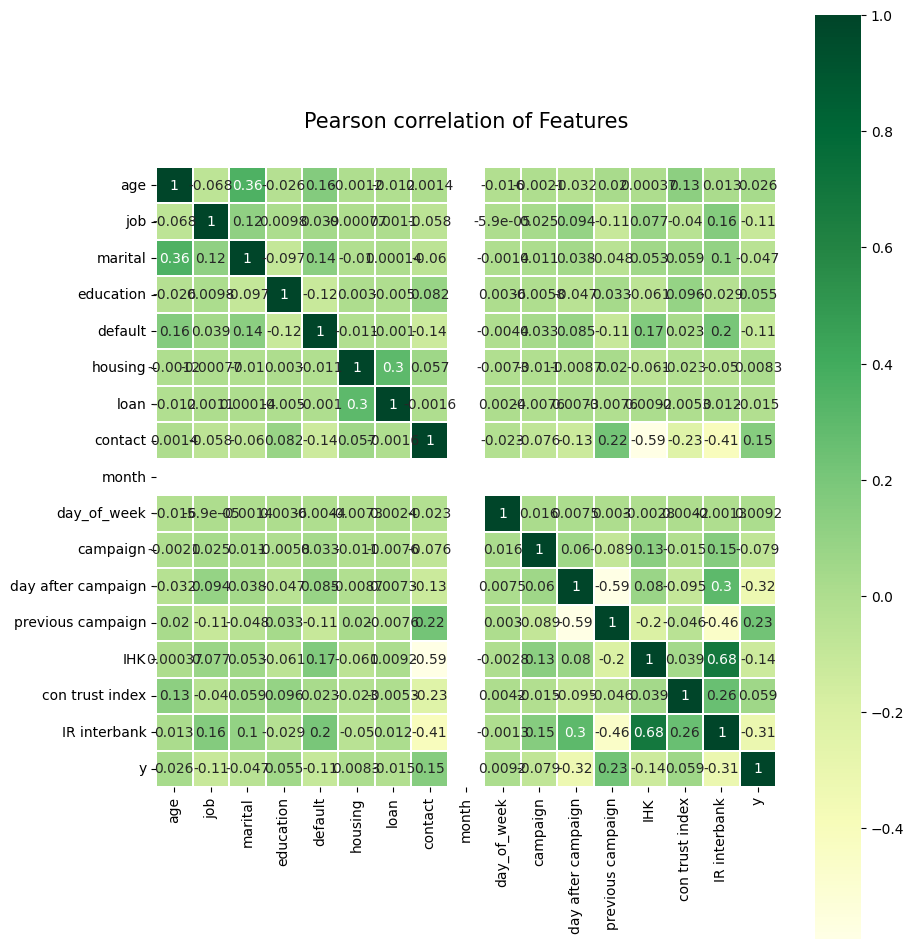

In [ ]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

# --------------------------------**Model** --------------------------------

## I. Logistic Regression

#### 1. Siapkan Data

In [ ]:
# Siapkan data
# Rubah kolom con trust index menjadi positif karena dalam fakta lapangan interest rate tidak ada yang negatif
df['con trust index'] = np.abs(df['con trust index'])
x1= df[['IHK','con trust index','IR interbank']] # features
y1= df['y']  # target

**Pemilihan feature :**
Berdasarkan menggunakan pendekatan pasar uang dimana nasabah akan memilih untuk mengambil suatu deposito berdasarkan IHK, indeks kepercayaan konsumen, dan Interest Rate antar bank.

- IHK (Indeks Harga Konsumen) dapat menggambarkan tingkat inflasi pada periode tersebut.
- Indeks kepercayaan konsumen menunjukkan seberapa percaya nasabah menempatkan dananya dalam bentuk deposito ke bank tersebut.
- Interest Rate antar Bank dapat memperkirakan bunga deposito yang akan diterima oleh nasabah.

#### 2. Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1= scaler.fit_transform(x1)

#### 3. Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split  data
x1_train, x1_test, y1_train,y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

# Menerapkan SMOTE pada data pelatihan
smote = SMOTE(random_state=42)
x1_train, y1_train = smote.fit_resample(x1_train, y1_train)

#### 4. Create and Train Model

In [ ]:
# Create and Train the Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0).fit(x1_train, y1_train)

#### 5. Model Evaluation

In [ ]:
# Melihat akurasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data pengujian
predictions1 = model.predict(x1_train)
predictions2 = model.predict(x1_test)

# Menghitung akurasi
accuracy1 = accuracy_score(y1_train, predictions1)
print(f'Nilai akurasi model train: {accuracy1}. Sehingga, terdapat {accuracy1} prediksi yang benar.')
accuracy2 = accuracy_score(y1_test, predictions2)
print(f'Nilai akurasi model test: {accuracy2}. Sehingga, terdapat {accuracy2} prediksi yang benar.')

Nilai akurasi model train: 0.7095135135135135. Sehingga, terdapat 0.7095135135135135 prediksi yang benar.
Nilai akurasi model test: 0.7059812422580074. Sehingga, terdapat 0.7059812422580074 prediksi yang benar.


**Conclusion : Terjadi penurunan akurasi** pada model test terhadap model trainnya, hal tersebut menunjukkan bahwa model menunjukkan hasil yang baik.

In [ ]:
# Melihat report dari hasil testnya
print("\nBerikut adalah report model testnya :\n", classification_report(y1_test,predictions2))


Berikut adalah report model testnya :
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      9958
           1       0.24      0.68      0.35      1344

    accuracy                           0.71     11302
   macro avg       0.59      0.69      0.58     11302
weighted avg       0.86      0.71      0.76     11302



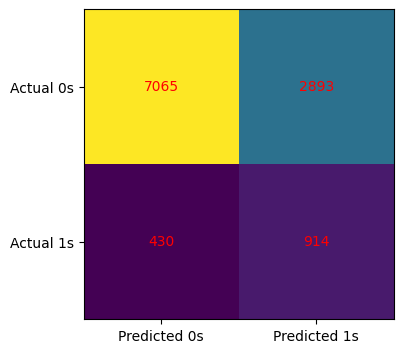

In [ ]:
# Melihat confusion matrix dari hasil testnya
cm =confusion_matrix(y1_test,predictions2)
# Visualisasikan hasil cm pada gambar

fig, ax= plt.subplots(figsize=(4,8))
ax.imshow(cm) # menampilkan gambar (image) dalam bentuk matriks 2D atau 3D.
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

### 6. Results

In [ ]:
# Melihat koefisien dan intercept model
koefisien = model.coef_
intersep = model.intercept_

print("Koefisien:", koefisien)
print("Intersep:", intersep)

Koefisien: [[ 0.27667582 -0.26803639 -1.10162633]]
Intersep: [-0.33449851]


## II. K-Nearest Neighbor

### 1. Siapkan Data

In [ ]:
# Day after campaign = 999 menunjukkan bahwa nasabag tidak pernah menerima campaign
df2=df.copy()
df2= df[df['day after campaign']< 999]
# Siapkan Data
x2 = df2[['contact',"campaign"]]
y2= df2['y']

**Pemilihan feature :**
Melihat dari faktor intensitas campaign yang dilakukan oleh bank melalui feature contact dan campaign.
- Contact menunjukkan apakah campaign disebarkan melalui telephone atau cellular.
- Campaign menunjukkan seberapa sering campaign tersebut diberikan ke nasabah.


### 2. Spliting data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split Data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
# Menerapkan SMOTE pada data pelatihan
smote=SMOTE(random_state=42)
x2_train, y2_train =smote.fit_resample(x2_train, y2_train)

3. Create and Train Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=20).fit(x2_train, y2_train)


### 4. Model Evaluation

In [ ]:
# Melihat akurasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data pengujian
predictions1 = model.predict(x2_train)
predictions2 = model.predict(x2_test)

# Menghitung akurasi
accuracy1 = accuracy_score(y2_train, predictions1)
print(f'Nilai akurasi model train: {accuracy1}. Sehingga, terdapat {accuracy1} prediksi yang benar.')
accuracy2 = accuracy_score(y2_test, predictions2)
print(f'Nilai akurasi model test: {accuracy2}. Sehingga, terdapat {accuracy2} prediksi yang benar.')

Nilai akurasi model train: 0.5360824742268041. Sehingga, terdapat 0.5360824742268041 prediksi yang benar.
Nilai akurasi model test: 0.6373626373626373. Sehingga, terdapat 0.6373626373626373 prediksi yang benar.


**Conclusion : Terjadi peningkatan akurasi** pada model test terhadap model trainnya, hal tersebut menunjukkan bahwa model menunjukkan hasil yang baik.

In [ ]:
# Melihat report dari hasil testnya
print("\nBerikut adalah report model testnya :\n", classification_report(y2_test,predictions2))


Berikut adalah report model testnya :
               precision    recall  f1-score   support

           0       0.52      0.17      0.25       167
           1       0.65      0.91      0.76       288

    accuracy                           0.64       455
   macro avg       0.59      0.54      0.51       455
weighted avg       0.60      0.64      0.57       455



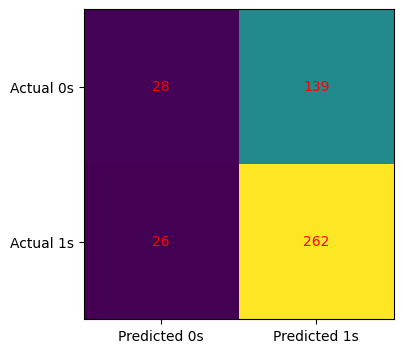

In [ ]:
# Melihat confusion matrix dari hasil testnya
cm =confusion_matrix(y2_test,predictions2)
# Visualisasikan hasil cm pada gambar

fig, ax= plt.subplots(figsize=(4,8))
ax.imshow(cm) # menampilkan gambar (image) dalam bentuk matriks 2D atau 3D.
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

## III. Support Vector Machine

### 1. Siapkan Data

In [ ]:
x3= df[['job','marital', 'education']]
y3= df['y']

**Pemilihan feature :**
Melihat dari faktor karakteristik/personal dari nasabah seperti job, marital status, atau education background

### 2. Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split Data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
# Menerapkan SMOTE pada data pelatihan
smote=SMOTE(random_state=42)
x3_train, y3_train =smote.fit_resample(x3_train, y3_train)

### 3. Create and Train Model

In [ ]:
from sklearn.svm import SVC
model= SVC(kernel='linear').fit(x3_train, y3_train)

### 4. Model Evaluation

In [ ]:
# Melihat akurasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data pengujian
predictions1 = model.predict(x3_train)
predictions2 = model.predict(x3_test)

# Menghitung akurasi
accuracy1 = accuracy_score(y3_train, predictions1)
print(f'Nilai akurasi model train: {accuracy1}. Sehingga, terdapat {accuracy1} prediksi yang benar.')
accuracy2 = accuracy_score(y3_test, predictions2)
print(f'Nilai akurasi model test: {accuracy2}. Sehingga, terdapat {accuracy2} prediksi yang benar.')

Nilai akurasi model train: 0.5581405405405405. Sehingga, terdapat 0.5581405405405405 prediksi yang benar.
Nilai akurasi model test: 0.5940541497080163. Sehingga, terdapat 0.5940541497080163 prediksi yang benar.


**Conclusion : Terjadi peningkatan akurasi** pada model test terhadap model trainnya, hal tersebut menunjukkan bahwa model menunjukkan hasil yang baik.

In [ ]:
# Melihat report dari hasil testnya
print("\nBerikut adalah report model testnya :\n", classification_report(y3_test,predictions2))


Berikut adalah report model testnya :
               precision    recall  f1-score   support

           0       0.90      0.61      0.72      9958
           1       0.15      0.50      0.23      1344

    accuracy                           0.59     11302
   macro avg       0.52      0.55      0.48     11302
weighted avg       0.81      0.59      0.67     11302



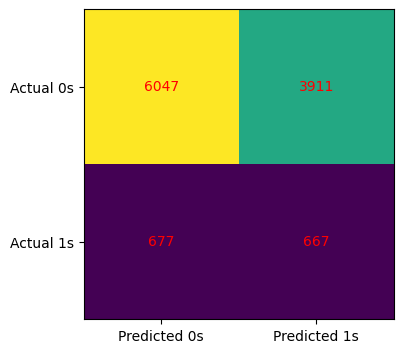

In [ ]:
# Melihat confusion matrix dari hasil testnya
cm =confusion_matrix(y3_test,predictions2)
# Visualisasikan hasil cm pada gambar

fig, ax= plt.subplots(figsize=(4,8))
ax.imshow(cm) # menampilkan gambar (image) dalam bentuk matriks 2D atau 3D.
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

## IX. Decision Tree

### 1. Siapkan Data

In [ ]:
x4= df[['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'IHK', 'con trust index', 'IR interbank']]
y4=df['y']

**Pemilihan variabel **didasari pada prinsip 4C yang biasa digunakan sebagai pertimbangan dalam memberikan kredit pada nasabah. Namun pada model ini, prinsip 5C tersebut akan dikaitkan dengan kesediaan nasabah untuk mengambil deposito. Prinsip 5 C tersebut meliputi Character, Capacity, Capital, dan Conditions.

### 2. Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x4= scaler.fit_transform(x4)

### 3. Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split Data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=1)
# Menerapkan SMOTE pada data pelatihan
smote=SMOTE(random_state=42)
x4_train, y4_train =smote.fit_resample(x4_train, y4_train)

### 4. Create, Train Model, and Optimizing Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier Model
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x4_train, y4_train)

### 5. Visualizing Tree

In [ ]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

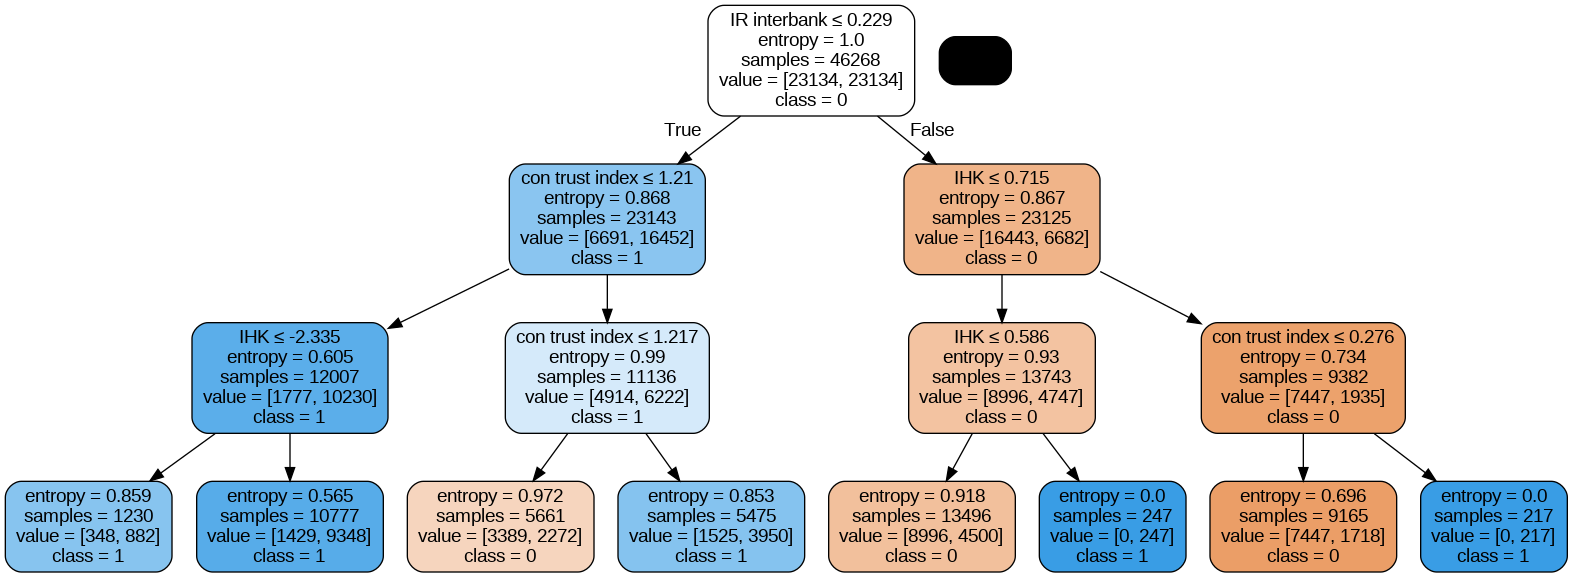

In [ ]:
dot_data = StringIO()
feature_cols =['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'IHK', 'con trust index', 'IR interbank']
tree.export_graphviz(
    dtc,
    out_file = dot_data,
    class_names = ['0','1'], # Target Names
    feature_names = feature_cols,
    filled = True,  # Whether to fill in the boxes with colours
    rounded = True, # Whether to round the corners of the boxes
    special_characters = True
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 7. Model Evaluation

In [ ]:
# Melihat akurasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data pengujian
predictions1 = dtc.predict(x4_train)
predictions2 = dtc.predict(x4_test)

# Menghitung akurasi
accuracy1 = accuracy_score(y4_train, predictions1)
print(f'Nilai akurasi model train: {accuracy1}. Sehingga, terdapat {accuracy1} prediksi yang benar.')
accuracy2 = accuracy_score(y4_test, predictions2)
print(f'Nilai akurasi model test: {accuracy2}. Sehingga, terdapat {accuracy2} prediksi yang benar.')

Nilai akurasi model train: 0.7451370277513616. Sehingga, terdapat 0.7451370277513616 prediksi yang benar.
Nilai akurasi model test: 0.8258715271633339. Sehingga, terdapat 0.8258715271633339 prediksi yang benar.


**Conclusion : Terjadi peningkatan akurasi** pada model test terhadap model trainnya, hal tersebut menunjukkan bahwa model menunjukkan hasil yang baik.

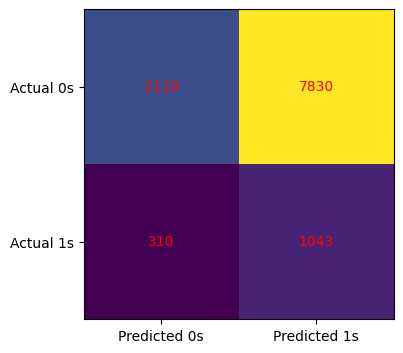

In [125]:
# Melihat confusion matrix dari hasil testnya
cm =confusion_matrix(y4_test,predictions2)
# Visualisasikan hasil cm pada gambar

fig, ax= plt.subplots(figsize=(4,8))
ax.imshow(cm) # menampilkan gambar (image) dalam bentuk matriks 2D atau 3D.
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

## X. Random Forest

### 1. Siapkan Data

In [ ]:
x5 = df.iloc[:, 0:16]
y5 = df['y']

**Alasan pemilihan variabel**: Pada model kali ini, semua feature akan digunakan dan nantinya feature akan diseleksi berdasarkan hasil **Finding Importance Features.**

### 2. Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x5= scaler.fit_transform(x5)

### 3. Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split Data
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.3, random_state=42)
# Menerapkan SMOTE pada data pelatihan
smote=SMOTE(random_state=42)
x5_train, y5_train =smote.fit_resample(x5_train, y5_train)

### 4. Create Model and Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(x5_train, y5_train)

In [ ]:
from sklearn import metrics
# Predict
y5_pred = rf.predict(x5_test)

# Get the Accuracy of the model
print("Accuracy :", metrics.accuracy_score(y5_test, y5_pred))

Accuracy : 0.8715271633339232


### 5. Finding Important Feature

In [ ]:
feature_names =df.columns
feature_names =feature_names[0:16]
feature_imp = pd.Series(rf.feature_importances_,feature_names).sort_values(ascending=True)

feature_imp

month                 0.000000
job                   0.013042
default               0.015748
loan                  0.017421
previous campaign     0.021933
housing               0.023615
marital               0.032504
contact               0.034008
day after campaign    0.039330
education             0.045698
IHK                   0.087240
con trust index       0.088238
day_of_week           0.090374
age                   0.113232
campaign              0.146755
IR interbank          0.230863
dtype: float64

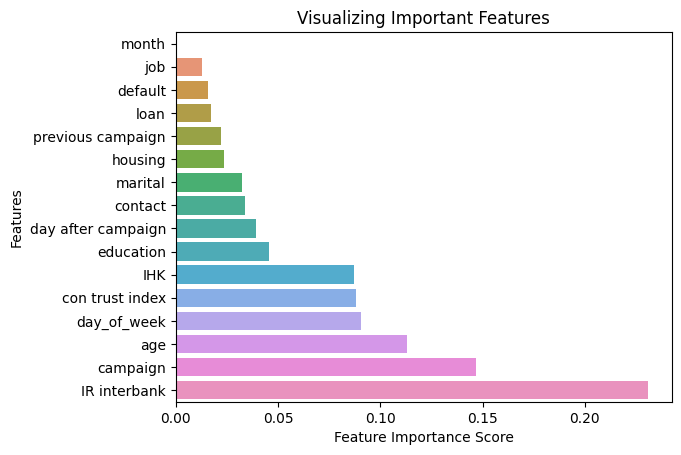

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Barplot
sns.barplot(x=feature_imp,
            y=feature_imp.index
           )
# Add Labels to the Graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### 6. Generating the model on Selected Features

**Feature yang dihapus :**  month, job, default, loan, previous campaign karena nilai feature importance yang kecil.

In [ ]:
# Siapkan data
x52 = df[[
    'marital',
    'education',
    'contact',
    'housing',
    'day_of_week',
    'campaign',
    'day after campaign',
    'IHK',
    'con trust index',
    'IR interbank']]
y52=df['y']

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x52= scaler.fit_transform(x52)

# Split Data
x52_train, x52_test, y52_train, y52_test = train_test_split(x52, y52, test_size=0.3, random_state=42)
# Menerapkan SMOTE pada data pelatihan
smote=SMOTE(random_state=42)
x42_train, y42_train =smote.fit_resample(x5_train, y5_train)

# Buat Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(x52_train, y52_train)

# Model Evaluasi
from sklearn import metrics
# Predict
y52_pred = rf.predict(x52_test)

# Get the Accuracy of the model
print("Accuracy model sebelum pemilihan feture:", metrics.accuracy_score(y5_test, y5_pred))
print("Accuracy model setelah pemilihan feture:", metrics.accuracy_score(y52_test, y52_pred))

Accuracy model sebelum pemilihan feture: 0.8715271633339232
Accuracy model setelah pemilihan feture: 0.8727658821447531


**Nilai akurasi meningkat** setelah feature selected dilakukan.

### 7. Model evaluasi setelah featured selected

In [ ]:
# Melihat akurasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data pengujian
predictions1 = dtc.predict(x52_train)
predictions2 = dtc.predict(x52_test)

# Menghitung akurasi
accuracy1 = accuracy_score(y52_train, predictions1)
print(f'Nilai akurasi model train: {accuracy1}. Sehingga, terdapat {accuracy1} prediksi yang benar.')
accuracy2 = accuracy_score(y52_test, predictions2)
print(f'Nilai akurasi model test: {accuracy2}. Sehingga, terdapat {accuracy2} prediksi yang benar.')

Nilai akurasi model train: 0.8249213150809601. Sehingga, terdapat 0.8249213150809601 prediksi yang benar.
Nilai akurasi model test: 0.8255176075030968. Sehingga, terdapat 0.8255176075030968 prediksi yang benar.


**Conclusion : Terjadi sedikit peningkatan akurasi** pada model test terhadap model trainnya, hal tersebut menunjukkan bahwa model menunjukkan hasil yang baik.

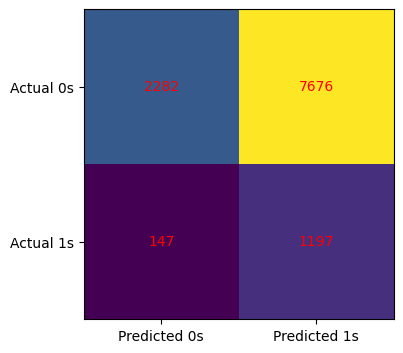

In [126]:
# Melihat confusion matrix dari hasil testnya
cm =confusion_matrix(y52_test,predictions2)
# Visualisasikan hasil cm pada gambar

fig, ax= plt.subplots(figsize=(4,8))
ax.imshow(cm) # menampilkan gambar (image) dalam bentuk matriks 2D atau 3D.
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

## XI. Naive Bayes

### 1. Siapkan Data

In [ ]:
# Siapkan Data
x6 = df[['default',	'marital']]
y6 = df['y']

**Pemilihan feature :**
Berdasarkan teori algorithma bahwa features bersifat independen atau setiap feature tidak berhubungan satu sama lainnya. Maka model kali ini akan menggunakan features yang tidak berkaitan yaitu default and marital statuss.
- default menunjukkan apakah nasabah memiliki hutang yang gagal bayar atau tidak.
- Marital menunjukkan status dari nasabah.

Kedua features tersebut bersifat independen atau memiliki korelasi yang rendah. Korelasi 2 feature tersebut yaitu 0.14. Sehingga, bobot tiap fiturnya akan sama

### 2. Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split Data
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.3, random_state=42)
# Menerapkan SMOTE pada data pelatihan
smote=SMOTE(random_state=42)
x6_train, y6_train =smote.fit_resample(x6_train, y6_train)

### 3. Create and Train Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x6_train, y6_train)

### 4. Model Evaluation

In [ ]:
# Melihat akurasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data pengujian
predictions1 = model.predict(x6_train)
predictions2 = model.predict(x6_test)

# Menghitung akurasi
accuracy1 = accuracy_score(y6_train, predictions1)
print(f'Nilai akurasi model train: {accuracy1}. Sehingga, terdapat {accuracy1} prediksi yang benar.')
accuracy2 = accuracy_score(y6_test, predictions2)
print(f'Nilai akurasi model test: {accuracy2}. Sehingga, terdapat {accuracy2} prediksi yang benar.')

Nilai akurasi model train: 0.5688648648648649. Sehingga, terdapat 0.5688648648648649 prediksi yang benar.
Nilai akurasi model test: 0.3078216244912405. Sehingga, terdapat 0.3078216244912405 prediksi yang benar.


**Conclusion : Tidak Terjadi peningkatan akurasi** pada model test terhadap model trainnya, hal tersebut menunjukkan bahwa model kurang baik.

In [ ]:
# Melihat report dari hasil testnya
print("\nBerikut adalah report model testnya :\n", classification_report(y6_test,predictions2))


Berikut adalah report model testnya :
               precision    recall  f1-score   support

           0       0.94      0.23      0.37      9958
           1       0.13      0.89      0.23      1344

    accuracy                           0.31     11302
   macro avg       0.54      0.56      0.30     11302
weighted avg       0.84      0.31      0.35     11302



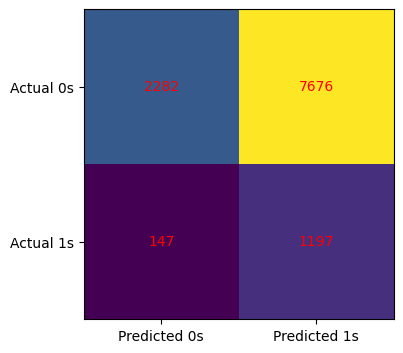

In [ ]:
# Melihat confusion matrix dari hasil testnya
cm =confusion_matrix(y6_test,predictions2)
# Visualisasikan hasil cm pada gambar

fig, ax= plt.subplots(figsize=(4,8))
ax.imshow(cm) # menampilkan gambar (image) dalam bentuk matriks 2D atau 3D.
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()